,x,u
0,0.00,120.000000000000
1,0.25,152.349958382698
2,0.50,177.577631456259
3,0.75,193.070294741427
4,1.00,196.820294741427
5,1.25,188.070294741427
6,1.50,167.577631456259
7,1.75,137.349958382698
8,2.00,100.000000000000


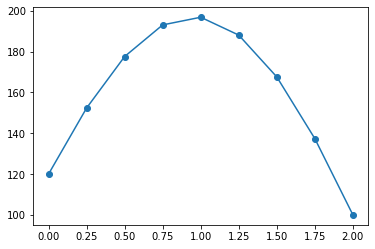

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from pprint import pprint
sp.init_printing()
def pvc(uxx, u, x, ua, ub, a, b, h):

    n = int((b - a) / h) + 1
    x_ = np.linspace(a, b, n)

    A = np.zeros((n, n))  
    b = np.zeros(n)  
    
    A[0][0] = 1
    b[0] = ua  
    for i in range(1, n-1):
        A[i][i-1] = 1  
        A[i][i] = -2  
        A[i][i+1] = 1  
        b[i] = h**2 * uxx.subs(x, x_[i])
    A[n-1][n-1] = 1  
    b[n-1] = ub
    
    A = sp.Matrix(A)
    b = sp.Matrix(b)

    return A.inv() * b

x = sp.Symbol('x')
u = sp.Symbol('u')

a = 0
b = 2

ua = 120
ub = 100

n = 9
h = (b-a) / (n-1)

u_ = pvc(-200*sp.exp(-(x-1)**2), u, x, ua, ub, a, b, h)
x_ = np.linspace(a, b, n, endpoint=True)

plt.plot(x_, u_)
plt.scatter(x_, u_)
from pandas import DataFrame
DataFrame({'x':x_, 'u':list(u_)})